# Simple Linear Regression

### **Analyze mpg data from seaborn's dataset**
    - Horsepower as independent variable
    - mpg as dependent variable

### - Analyze the relationship
### - Apply Simple Linear Regression
### - Perform Simultant Test (F-Test) and Partial Test (T-Test)
### - Interpret the result
### - Use α 5%  (α = 0.05)


* https://www.statsmodels.org/stable/index.html
* https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
* https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings
* https://docs.python.org/3/library/warnings.html

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## The data concerns city-cycle fuel consumption in miles per gallon.

In [ ]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
# drop missing value
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
df[['mpg', 'horsepower']].describe()

,mpg,horsepower
count,392.000000,392.000000
mean,23.445918,104.469388
std,7.805007,38.491160
min,9.000000,46.000000
25%,17.000000,75.000000
50%,22.750000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


# **Relationship (Correlation)**

In [ ]:
# Correlation: mpg vs horsepower
df[['mpg', 'horsepower']].corr()

,mpg,horsepower
mpg,1.000000,-0.778427
horsepower,-0.778427,1.000000


## Interpretasi

Apa arti korelasi -0.77?

- Bernilai negatif, itu berarti hubungannya berbanding terbalik. Semakin besar horsepower, maka semakin kecil nilai mpg.
- Nilai -0.77 termasuk ke dalam strong correlation.

* https://seaborn.pydata.org/generated/seaborn.regplot.html

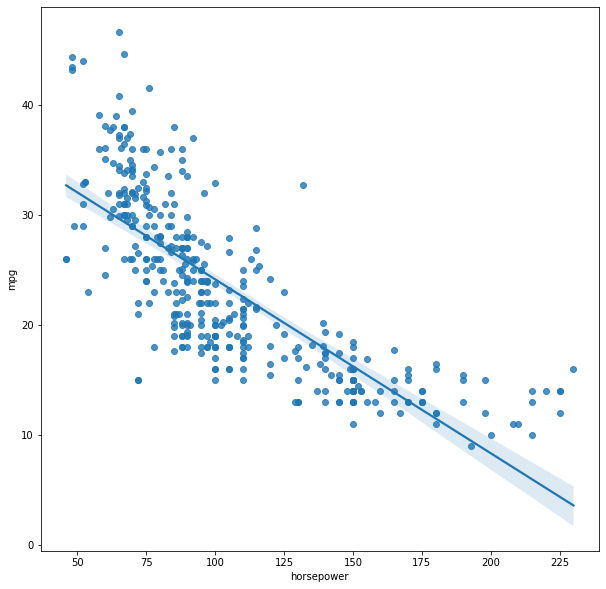

In [ ]:
# Regression Plot
plt.figure(figsize=(10,10))
sns.regplot(x = 'horsepower', y = 'mpg', data = df);

# **Simple Linear Regression**

* https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

Untuk mengaplikasikan simple linear regression pada dataset sesuai dengan instruksi soal, berarti:

- X: horsepower<br>
- y: mpg

In [ ]:
X = df['horsepower']
y = df['mpg']

In [ ]:
# ditambahkan constant
sm_lm = sm.OLS(df['mpg'], sm.add_constant(df[['horsepower']]))

# Fitting (model belajar dari training set)
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           7.03e-81
Time:                        07:23:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

# **Interpretasi F-test dan t-test**

### **F-test**
* Nilai F-test statistic digunakan untuk melihat apakah ada pengaruh signifikan antara mpg dengan (semua feature, dalam kasus ini hanya) horsepower. Apakah horsepower itu memengaruhi nilai mpg?
<br><br>

* H0: horsepower tidak berpengaruh signifikan terhadap mpg
* H1: horsepower berpengaruh signifikan terhadap mpg
<br><br>

* Karena nilai Prob (F-statistic) nya < 0.05, yaitu 7.03e-81 --> pvalue<0.05, maka dapat dikatakan bahwa kita menolak / gagal menerima null hypotesis. Dengan kata lain, berdasarkan uji statistik, ada cukup bukti kalau horsepower itu memengaruhi nilai mpg.
<br><br>

### **t-test**

- B0: constants
- B1: horsepower

- B0 P value = 0.000 ---> P value < 0.05, reject Ho, artinya intercept dibutuhkan dalam model ini.<br>
- B1 P value = 0.000 ---> P value < 0.05, reject Ho, artinya horsepower berpengaruh secara signifikan terhadap mpg (secara negatif, lihat nilai coeff horsepowernya negatif --> Semakin tinggi horse power maka cenderung semakin rendah mpg). <br>


### **Interpretasi Coeff**

y = 39.93 + -0.1578 x

* Coeff constant adalah nilai intercept (39.93) <br>
y = B0 + B1X, y dengan X=0, artinya adalah nilai mpg ketika horsepowernya 0 (tapi dalam kasus ini dapat diabaikan, karena tidak ada mobil dalam kondisi normal dengan horsepower 0).<br><br>

* Coeff horsepower = -0.1578 <br>
Ini berarti untuk tiap kenaikan 1 horsepower, nilai mpg akan berkurang sebanyak 0.1578.<br><br>


### **R-square**

* Nilai R-squared sebesar 0.606, artinya model simple linear regression yang dengan hanya menggunakan 'horsepower' sebagai fiturnya, dapat menjelaskan sekitar 60.6% variasi dari nilai mpg.

# **Melihat nilai hasil prediksi dari model**

In [ ]:
X

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 392, dtype: float64

In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
# Nilai mpg actual
y_true = y.reset_index().drop(columns='index')
y_true

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [ ]:
df[['mpg']]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [ ]:
# Nilai mpg hasil prediksi
y_predict = result.predict()
yhat = pd.DataFrame(data=y_predict, columns=['prediction'])
yhat

,prediction
0,19.416046
1,13.891480
2,16.259151
3,16.259151
4,17.837598
...,...
387,26.361214
388,31.727935
389,26.676903
390,27.466127


In [ ]:
df['y_hat'] = yhat
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,y_hat
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.416046
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,13.891480
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.259151
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.259151
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,17.837598
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,NaN
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,NaN
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,NaN
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,NaN


In [ ]:
df[['horsepower','mpg','y_hat']]

,horsepower,mpg,y_hat
0,130.0,18.0,19.416046
1,165.0,15.0,13.891480
2,150.0,18.0,16.259151
3,150.0,16.0,16.259151
4,140.0,17.0,17.837598
...,...,...,...
393,86.0,27.0,NaN
394,52.0,44.0,NaN
395,84.0,32.0,NaN
396,79.0,28.0,NaN


In [ ]:
y_merged = [y_true, yhat]

pd.concat(y_merged, axis=1, join='inner')

,mpg,prediction
0,18.0,19.416046
1,15.0,13.891480
2,18.0,16.259151
3,16.0,16.259151
4,17.0,17.837598
...,...,...
387,27.0,26.361214
388,44.0,31.727935
389,32.0,26.676903
390,28.0,27.466127


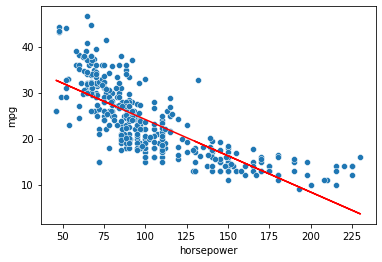

In [ ]:
# titik biru: nilai mpg actual
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df)

# garis merah: fungsi regresi (nilai prediksi mpg)
plt.plot(df['horsepower'], yhat, color='r') # y = 39.93 + -0.1578 x

## **Cek nilai RMSE model (cost function)**

In [ ]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_true, yhat)
rmse

# satuan RMSE mengacu pada satuan variabel y (dalam kasus ini mpg)

array([4.89322623])

# **Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

### - Analyze the relationship
### - Apply Multiple Linear Regression with dummy variable
### - Perform Simultant Test (F-Test) and Partial Test (T-Test)
### - Check the assumptions
### - Interpret the result
### - Use α 5% (α = 0.05)

**Try to find the best model without any multicollinearity, or at least the least one.**

## **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)
<br><br>
2. carat<br>
weight of the diamond (0.2--5.01)
<br><br>
3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)
<br><br>
4. color<br>
diamond colour, from J (worst) to D (best)
<br><br>
5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
<br><br>
6. x<br>
length in mm (0--10.74)
<br><br>
7. y<br>
width in mm (0--58.9)
<br><br>
8. z<br>
depth in mm (0--31.8)
<br><br>
9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
<br><br>
10. table<br>
width of top of diamond relative to widest point (43--95)

In [ ]:
# Load dataset
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
